<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/1_1_Supervised_Learning_with_scikit_learn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-1 Supervised Learning with scikit-learn - Classification

## Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
plt.style.use('ggplot')

## Data

### Telecom Churn

In [ ]:
data_url = 'https://drive.google.com/uc?id=1r8oME0GRcWjWq0WUnuDA5eMvGZgIcbfQ'
telecom_churn = pd.read_csv(data_url, index_col=0)
telecom_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   float

In [ ]:
telecom_churn.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## Machine learning with scikit-learn

- Feature: predictor variable, independent variable
- Target variable: response variable, dependent variable, label

### Requirements for supervised learning

- No missing vlaues
- Data in numeric format
- Data stored in pandas DataFrame or numpy array

### scikit-learn syntax
```python
from sklearn.module import Model

model = Model()
model.fit(X, y)

predictions = model.predict(X_new)
```

## The classification challenge

### Classifying labels of unseen data

1. Build a model
2. Model learns from the labeled data we pass to it
3. Pass unlabeled data to the model as input
4. Model predicts the labels of the unseen data

### k-Nearest Neighbours

- Predict the label of a data point by:
    - Looking at the `k` closest labeled data points
    - Taking a majority vote

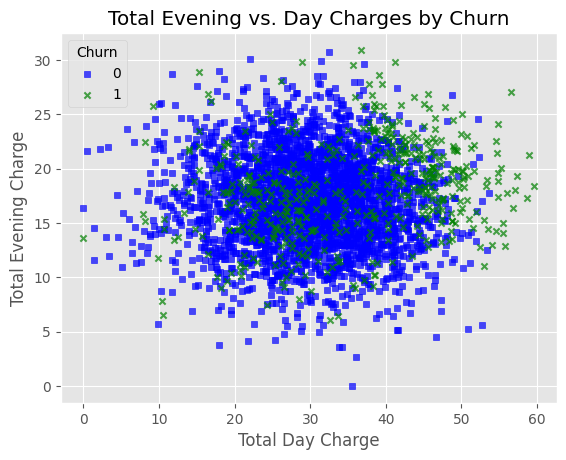

In [ ]:
category_scatter(x='total_day_charge',
                 y='total_eve_charge',
                 label_col='churn',
                 data=telecom_churn)

plt.xlabel('Total Day Charge')
plt.ylabel('Total Evening Charge')
plt.legend(title='Churn')
plt.title('Total Evening vs. Day Charges by Churn')

plt.show()

In [ ]:
X = telecom_churn[['total_day_charge', 'total_eve_charge']].values
y = telecom_churn['churn'].values

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

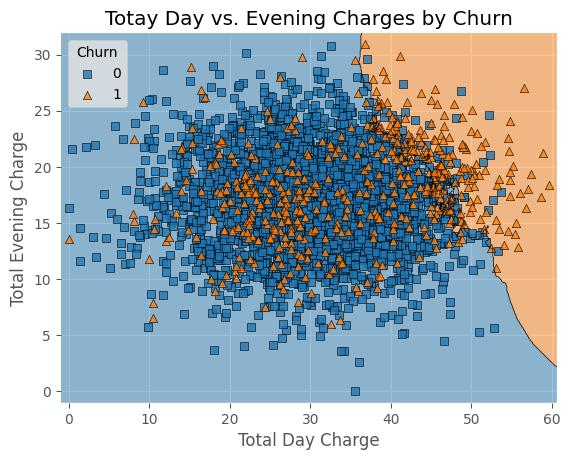

In [ ]:
plot_decision_regions(X, y, clf=model)

plt.xlabel('Total Day Charge')
plt.ylabel('Total Evening Charge')
plt.legend(title='Churn')
plt.title('Totay Day vs. Evening Charges by Churn')

plt.show()

In [ ]:
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])

model.predict(X_new)

array([1, 0, 0])

### K-Nearest Neighbors 2

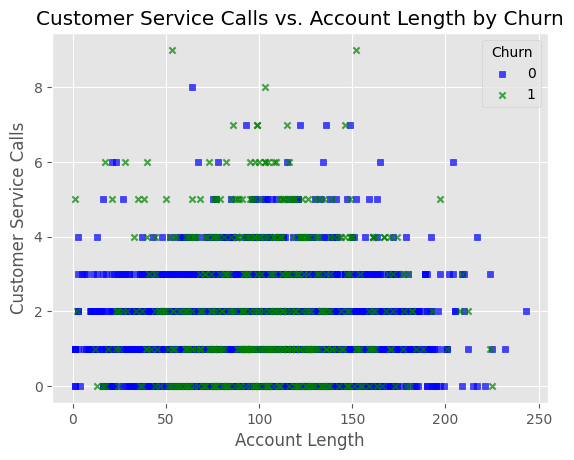

In [ ]:
category_scatter(x='account_length',
                 y='customer_service_calls',
                 label_col='churn',
                 data=telecom_churn)

plt.xlabel('Account Length')
plt.ylabel('Customer Service Calls')
plt.legend(title='Churn')
plt.title('Customer Service Calls vs. Account Length by Churn')

plt.show()

In [ ]:
X = telecom_churn[['account_length', 'customer_service_calls']].values
y = telecom_churn['churn'].values

model2 = KNeighborsClassifier(n_neighbors=6)

model2.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

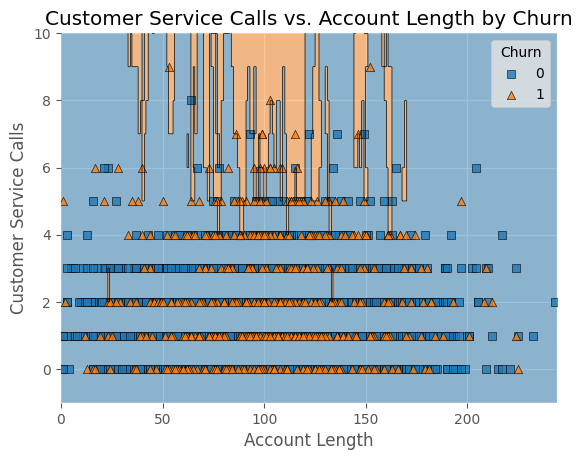

In [ ]:
plot_decision_regions(X, y, clf=model2)

plt.xlabel('Account Length')
plt.ylabel('Customer Service Calls')
plt.legend(title='Churn')
plt.title('Customer Service Calls vs. Account Length by Churn')

plt.show()

In [ ]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

y_pred = model2.predict(X_new)
y_pred

array([0, 1, 0])

## Measuring model performance

- In classification, **accuracy** is a commonly used metric

$$
\text{accuracy} = \frac{\text{correct predictions}}{\text{total observations}}
$$

In [ ]:
X = telecom_churn[['total_day_charge', 'total_eve_charge']].values
y = telecom_churn['churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=21,
                                                    stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 2), (1000, 2), (2333,), (1000,))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn.score(X_test, y_test)

0.872

In [ ]:
# manual score
y_pred = knn.predict(X_test)
(y_test == y_pred).sum() / len(y_test)

0.872

In [ ]:
model_k1 = KNeighborsClassifier(n_neighbors=1)
model_k9 = KNeighborsClassifier(n_neighbors=9)
model_k18 = KNeighborsClassifier(n_neighbors=18)

model_k1.fit(X_train, y_train)
model_k9.fit(X_train, y_train)
model_k18.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=18)

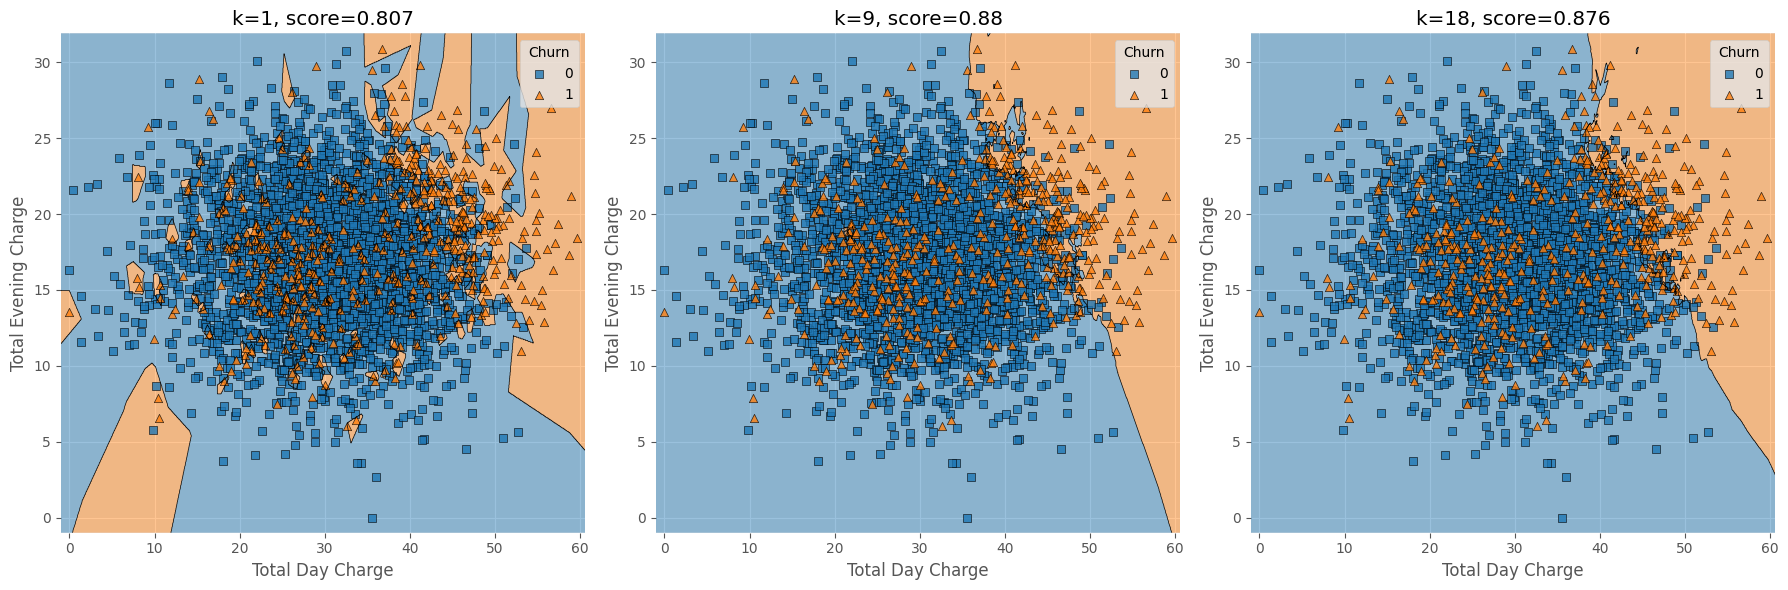

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


for ax, clf, title in zip(axes, [model_k1, model_k9, model_k18], [f'k=1, score={model_k1.score(X_test, y_test)}',
                                                                  f'k=9, score={model_k9.score(X_test, y_test)}',
                                                                  f'k=18, score={model_k18.score(X_test, y_test)}']):
    plot_decision_regions(X, y, clf=clf, ax=ax)
    ax.set_xlabel('Total Day Charge')
    ax.set_ylabel('Total Evening Charge')
    ax.legend(title='Churn')
    ax.set_title(title)

plt.tight_layout()
plt.show()

### Model Complexity

- Larger `k`: less complex model, can cause underfitting
- Smaller `k`: more complex model, can cause overfitting, model is more sensitive to noise in the data

### Model Complexity Curve

In [ ]:
train_accuracies = {}
test_accuracies = {}

neighbours = np.arange(1, 26)

for k in neighbours:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accuracies[k] = model.score(X_train, y_train)
    test_accuracies[k] = model.score(X_test, y_test)

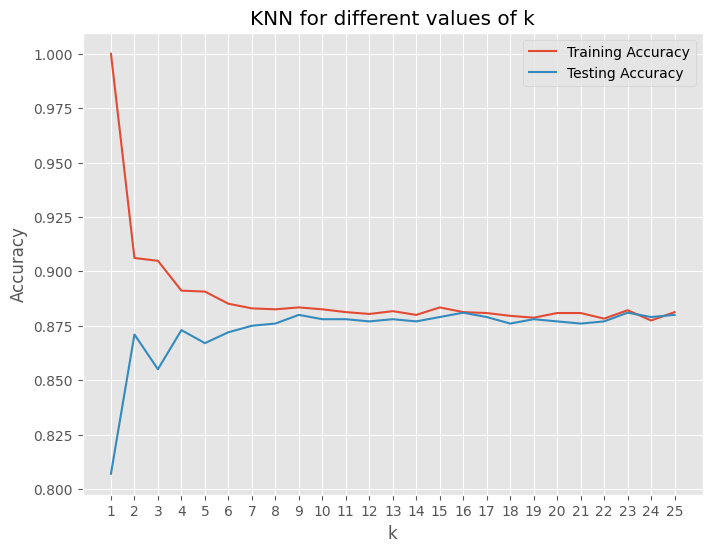

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(neighbours, train_accuracies.values(), label='Training Accuracy')
plt.plot(neighbours, test_accuracies.values(), label='Testing Accuracy')

plt.title('KNN for different values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(neighbours)
plt.legend()

plt.show()

This plot shows the best value for `k` is about 13.

In [ ]:
import pprint
pprint.pprint(train_accuracies)
pprint.pprint(test_accuracies)

{1: 1.0,
 2: 0.9061294470638662,
 3: 0.9048435490784398,
 4: 0.8911273039005573,
 5: 0.8906986712387484,
 6: 0.8851264466352337,
 7: 0.8829832833261895,
 8: 0.8825546506643807,
 9: 0.8834119159879983,
 10: 0.8825546506643807,
 11: 0.8812687526789541,
 12: 0.8804114873553365,
 13: 0.8816973853407629,
 14: 0.8799828546935277,
 15: 0.8834119159879983,
 16: 0.8812687526789541,
 17: 0.8808401200171453,
 18: 0.8795542220317188,
 19: 0.8786969567081011,
 20: 0.8808401200171453,
 21: 0.8808401200171453,
 22: 0.8782683240462923,
 23: 0.8821260180025718,
 24: 0.8774110587226747,
 25: 0.8812687526789541}
{1: 0.807,
 2: 0.871,
 3: 0.855,
 4: 0.873,
 5: 0.867,
 6: 0.872,
 7: 0.875,
 8: 0.876,
 9: 0.88,
 10: 0.878,
 11: 0.878,
 12: 0.877,
 13: 0.878,
 14: 0.877,
 15: 0.879,
 16: 0.881,
 17: 0.879,
 18: 0.876,
 19: 0.878,
 20: 0.877,
 21: 0.876,
 22: 0.877,
 23: 0.881,
 24: 0.879,
 25: 0.88}


### Train/test split and computing accuracy

In [ ]:
X = telecom_churn.drop('churn', axis=1).values
y = telecom_churn['churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 18), (667, 18), (2666,), (667,))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.score(X_test, y_test)

0.8740629685157422

### Overfitting and Underfitting

In [ ]:
neighbours = np.arange(1, 13)
train_accuracies = []
test_accuracies = []

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # compute the accuracy
    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

In [ ]:
train_accuracies

[1.0,
 0.9036009002250562,
 0.9114778694673669,
 0.8945986496624156,
 0.8953488372093024,
 0.8893473368342085,
 0.8885971492873218,
 0.8863465866466617,
 0.8870967741935484,
 0.8840960240060015,
 0.8874718679669917,
 0.8837209302325582]

In [ ]:
test_accuracies

[0.7946026986506747,
 0.8605697151424287,
 0.8500749625187406,
 0.8695652173913043,
 0.8740629685157422,
 0.8650674662668666,
 0.8710644677661169,
 0.863568215892054,
 0.8725637181409296,
 0.8665667166416792,
 0.8710644677661169,
 0.8710644677661169]

### Visualizing model complexity

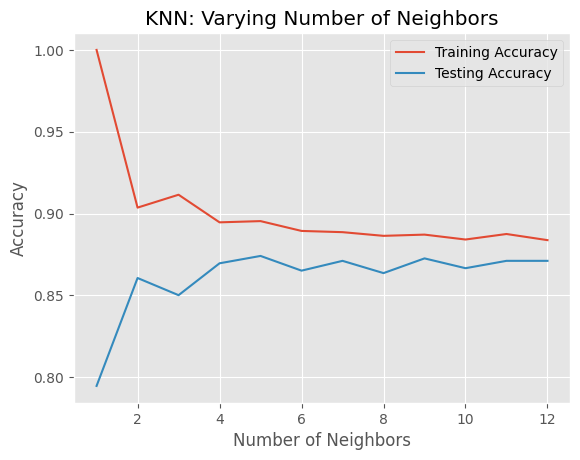

In [ ]:
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbours, train_accuracies, label='Training Accuracy')
plt.plot(neighbours, test_accuracies, label='Testing Accuracy')

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

plt.show()